**COINDESK**

In [ ]:
# Import Libraries
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
# The List of 20 type of cryptocurrency
coin_list = ['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']

In [ ]:
#defining the dataframe
main_df = pd.DataFrame()

In [ ]:
for coin in coin_list:
    coin_df = pd.DataFrame()
    df = pd.DataFrame(index=[0])
    
    # Defining the Start Date and End Date
    datetime_end = datetime(2021, 7, 2, 0, 0)
    datetime_check = datetime(2021, 7, 1, 0, 0)
    
    while len(df) > 0:
        if datetime_end == datetime_check:
            break
        
        datetime_start = datetime_end - relativedelta(hours = 12)
        
        #Api for the scrapping
        url = 'https://production.api.coindesk.com/v2/price/values/'+ coin +'?start_date='+datetime_start.strftime("%Y-%m-%dT%H:%M") + '&end_date=' + datetime_end.strftime("%Y-%m-%dT%H:%M") + '&ohlc=true'
        
        #we are using the request to fetch the data from the api in the json format and then storing it into the dataframe.
        temp_data = requests.get(url).json()
        df = pd.DataFrame(temp_data['data']['entries'])
        df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close']
        
        # To handle the Missing Data
        insert_ids_list = [np.nan]
        
        while len(insert_ids_list) > 0:
            timestamp_checking = np.array(df['Timestamp'][1:]) - np.array(df['Timestamp'][:-1])
            insert_ids_list = np.where(timestamp_checking!= 60000)[0]
            if len(insert_ids_list) > 0:
                print(str(len(insert_ids_list)) + ' mismatched.')
                insert_ids = insert_ids_list[0]
                temp_df = df.iloc[insert_ids.repeat(int(timestamp_checking[insert_ids]/60000)-1)].reset_index(drop=True)
                temp_df['Timestamp'] = [temp_df['Timestamp'][0] + i*60000 for i in range(1, len(temp_df)+1)]
                df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
                insert_ids_list = insert_ids_list[1:]
                
        
        #adding datetime and symbol to dataframe
        df = df.drop(['Timestamp'], axis=1)
        df['Datetime'] = [datetime_end - relativedelta(minutes=len(df)-i) for i in range(0, len(df))]
        coin_df = df.append(coin_df)
        datetime_end = datetime_start
        
    coin_df['Symbol'] = coin
    main_df = main_df.append(coin_df)

In [ ]:
main_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Datetime', 'Symbol'], dtype='object')

**COINBASE**

In [ ]:
import json
import requests
url = 'https://api.coinbase.com/v2/prices/USD/spot?'
response = requests.get(url).json()
res = requests.get(url + '?fsym=BTC&tsym=CAD&limit=500')
data = pd.DataFrame(json.loads(res.content)['data'])
data.columns

Index(['base', 'currency', 'amount'], dtype='object')

**CRYPTOCOMAPRE**

In [ ]:
#IMPORT 
import json
import requests

endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)
hist.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close'], dtype='object')

**CRYPTOWATCH**

In [ ]:
import pandas as pd
import numpy as np
# load data vizualization packages
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# other libraries for visualization
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.io as pio
# load web scrapping packages
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
import os

In [ ]:
# stating the url for web scrapping
my_url = 'https://api.cryptowat.ch/markets'
# getting the content of our url
html_data = requests.get(my_url).text
# passing the url content via beautiful soup
soup_object = soup(html_data, 'html.parser')
# scrape the data by creating a fuction
for link in soup_object.find_all('a', href=True):       # In html anchor/link is represented by the tag <a>
    print(link.get('href'))

url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'
def get_coin_data(url,symbol, exchange='binance', after='2018-09-01'):
    my_url = url.format(symbol=symbol, exchange=exchange)
    response = requests.get(my_url, params={
        'periods': '21600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    
    html_data = response.json()
    df = pd.DataFrame(html_data['result']['21600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'volume', 'MarketCap'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'
# pull data from crypto for btc and eth
btc = get_coin_data(url,'btc', 'bitstamp')
eth = get_coin_data(url,'eth', 'bitstamp') 
ada = get_coin_data(url,'ada', 'bitstamp')
xrp = get_coin_data(url,'xrp', 'bitstamp')
usdt = get_coin_data(url,'usdt', 'bitstamp')
matic = get_coin_data(url,'matic', 'bitstamp')
usdc = get_coin_data(url,'usdc', 'bitstamp')
shib = get_coin_data(url,'shib', 'bitstamp')
ftm = get_coin_data(url,'ftm', 'bitstamp')
uma = get_coin_data(url,'uma', 'bitstamp')

aave = get_coin_data(url,'aave', 'bitstamp')
doge = get_coin_data(url,'doge', 'bitstamp')
ftt = get_coin_data(url,'ftt', 'bitstamp')
dot = get_coin_data(url,'dot', 'bitstamp')
uni = get_coin_data(url,'uni', 'bitstamp')
link = get_coin_data(url,'link', 'bitstamp')
bch = get_coin_data(url,'bch', 'bitstamp')
ltc = get_coin_data(url,'ltc', 'bitstamp')
grt = get_coin_data(url,'grt', 'bitstamp')
xrp = get_coin_data(url,'xrp', 'bitstamp')
#fil = get_coin_data(url,'fil', 'bitstamp')

algo = get_coin_data(url,'algo', 'bitstamp')
#eos = get_coin_data(url,'eos', 'bitstamp')
# The List of 20 type of cryptocurrency
#coin_list = ['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']
# export to csv to make the index a column
btc.to_csv('btc.csv', index = True)
eth.to_csv('eth.csv', index = True)
ada.to_csv('ada.csv', index = True)
xrp.to_csv('xrp.csv', index = True)
usdt.to_csv('usdt.csv', index = True)
matic.to_csv('matic.csv', index = True)
usdc.to_csv('usdc.csv', index = True)
shib.to_csv('shib.csv', index = True)
ftm.to_csv('ftm.csv', index = True)
uma.to_csv('uma.csv', index = True)
doge.to_csv('doge.csv', index = True)
xrp.to_csv('xrp.csv', index = True)
dot.to_csv('dot.csv', index = True)
uni.to_csv('uni.csv', index = True)
link .to_csv('link.csv', index = True)
bch.to_csv('bch.csv', index = True)
ftt.to_csv('ftt.csv', index = True)
grt.to_csv('grt.csv', index = True)
#etc.to_csv('etc.csv', index = True)
#fil.to_csv('fil.csv', index = True)
aave.to_csv('aave.csv', index = True)
algo.to_csv('algo.csv', index = True)
ltc.to_csv('ltc.csv', index = True)

In [ ]:
btc

OpenPrice  HighPrice  LowPrice  ClosePrice       volume  \
CloseTime                                                                      
2019-02-16 12:00:00    3582.44    3592.81   3576.14     3589.97   588.206625   
2019-02-16 18:00:00    3589.97    3609.00   3565.16     3592.07  1077.642080   
2019-02-17 00:00:00    3589.29    3600.36   3575.00     3580.43   627.526594   
2019-02-17 06:00:00    3578.74    3598.45   3570.13     3598.45   611.259674   
2019-02-17 12:00:00    3596.64    3663.34   3569.00     3582.49  1787.550376   
...                        ...        ...       ...         ...          ...   
2023-03-26 06:00:00   27493.00   27673.00  27453.00    27583.00   147.940057   
2023-03-26 12:00:00   27582.00   27930.00  27520.00    27903.00   198.782661   
2023-03-26 18:00:00   27927.00   28217.00  27680.00    27860.00   412.809120   
2023-03-27 00:00:00   27860.00   28160.00  27716.00    28004.00   340.671472   
2023-03-27 06:00:00   27992.00   28051.00  27816.00    27855.00   185.522922   

                        MarketCap  
CloseTime                          
2019-02-16 12:00:00  2.108721e+06  
2019-02-16 18:00:00  3.872503e+06  
2019-02-17 00:00:00  2.253766e+06  
2019-02-17 06:00:00  2.192649e+06  
2019-02-17 12:00:00  6.453418e+06  
...                           ...  
2023-03-26 06:00:00  4.080787e+06  
2023-03-26 12:00:00  5.510076e+06  
2023-03-26 18:00:00  1.153378e+07  
2023-03-27 00:00:00  9.528052e+06  
2023-03-27 06:00:00  5.180629e+06  

[6000 rows x 6 columns]

In [ ]:
eth

OpenPrice  HighPrice  LowPrice  ClosePrice        volume  \
CloseTime                                                                       
2019-02-16 12:00:00     121.27     121.90    121.14      121.61   2193.391800   
2019-02-16 18:00:00     121.57     123.71    121.20      121.79   7755.896464   
2019-02-17 00:00:00     121.82     122.65    121.40      121.68   5852.678802   
2019-02-17 06:00:00     121.64     122.51    121.30      122.51   2831.510400   
2019-02-17 12:00:00     122.47     129.02    122.16      125.50  23455.877588   
...                        ...        ...       ...         ...           ...   
2023-03-26 06:00:00    1743.90    1758.50   1741.50     1755.20   2480.095620   
2023-03-26 12:00:00    1755.90    1789.10   1752.20     1779.70   1563.545979   
2023-03-26 18:00:00    1779.90    1800.60   1755.90     1768.10   1528.108168   
2023-03-27 00:00:00    1768.70    1784.00   1756.40     1775.70   1274.923252   
2023-03-27 06:00:00    1775.70    1781.90   1760.00     1762.30    742.674603   

                        MarketCap  
CloseTime                          
2019-02-16 12:00:00  2.664431e+05  
2019-02-16 18:00:00  9.486577e+05  
2019-02-17 00:00:00  7.147781e+05  
2019-02-17 06:00:00  3.451311e+05  
2019-02-17 12:00:00  2.938309e+06  
...                           ...  
2023-03-26 06:00:00  4.342646e+06  
2023-03-26 12:00:00  2.773904e+06  
2023-03-26 18:00:00  2.714483e+06  
2023-03-27 00:00:00  2.255853e+06  
2023-03-27 06:00:00  1.314434e+06  

[6000 rows x 6 columns]

In [ ]:
coin_btc = pd.read_csv('btc.csv')
coin_eth = pd.read_csv('eth.csv')
coin_ada = pd.read_csv('ada.csv')
coin_xrp = pd.read_csv('xrp.csv')
coin_usdt = pd.read_csv('usdt.csv')
coin_matic = pd.read_csv('matic.csv')
coin_usdc = pd.read_csv('usdc.csv')
coin_shib = pd.read_csv('shib.csv')
coin_ftm = pd.read_csv('ftm.csv')
coin_uma = pd.read_csv('uma.csv')
coin_doge = pd.read_csv('doge.csv')
coin_ltc= pd.read_csv('ltc.csv')
coin_dot = pd.read_csv('dot.csv')
coin_uni = pd.read_csv('uni.csv')
coin_link = pd.read_csv('link.csv')
coin_bch= pd.read_csv('bch.csv')
coin_ltc= pd.read_csv('ltc.csv')
coin_grt = pd.read_csv('grt.csv')
coin_ftt = pd.read_csv('ftt.csv')
coin_aave = pd.read_csv('aave.csv')
coin_algo = pd.read_csv('algo.csv')
#coin_eos = pd.read_csv('eos.csv')

In [ ]:
coin_btc['Symbol'] = 'BTC'
coin_eth['Symbol'] = 'ETH'
coin_ada['Symbol'] = 'ADA'
coin_xrp['Symbol'] = 'XRP'
coin_usdt['Symbol'] = 'USDT'
coin_matic['Symbol'] = 'MATIC'
coin_usdc['Symbol'] = 'USDC'
coin_shib['Symbol'] = 'SHIB'
coin_ftm['Symbol'] = 'FTM'
coin_uma['Symbol'] = 'UMA'
coin_doge ['Symbol'] = 'DOGE'
coin_dot ['Symbol'] = 'DOT'
coin_uni ['Symbol'] = 'UNI'
coin_link['Symbol'] = 'LINK' 
coin_bch['Symbol'] = 'BCH'
coin_ltc['Symbol'] = 'LTC'
coin_grt ['Symbol'] = 'GRT'
coin_ftt ['Symbol'] = 'FTT'
coin_aave['Symbol'] = 'AAVE'
coin_algo ['Symbol'] = 'ALGO'
#coin_eos ['Symbol'] = 'EOS'
# assign Name column to the individual datasets



In [ ]:
# This Column gives the names of the coins
coin_btc['Name'] = 'Bitcoin'
coin_eth['Name'] = 'Ethereum'
coin_ada['Name'] = 'Cardano'
coin_xrp['Name'] = 'Ripple'
coin_usdt['Name'] = 'Tether'
coin_matic['Name'] = 'Polygon'
coin_usdc['Name'] = 'USD Coin'
coin_shib['Name'] = 'SHIBA INU'
coin_ftm['Name'] = 'Fantom'
coin_uma['Name'] = 'Universal Market Access'
coin_doge ['Name'] = 'DOGE'
coin_dot ['Name'] = 'Polkadot'
coin_uni ['Name'] = 'Uniswap'
coin_link['Name'] = 'chainlink' 
coin_bch['Name'] = 'Bitcoin Cash'
coin_ltc['Name'] = 'Litecoin'
coin_grt ['Name'] = 'Graph'
#coin_etc['Name'] = 'ETC'
coin_ftt ['Name'] = 'Ftxtoken'
coin_aave['Name'] = 'AAVE'
coin_algo ['Name'] = 'Algorand'
#coin_eos ['Name'] = 'EOS'

In [ ]:
df_coins = [coin_btc, coin_eth, coin_ada, coin_xrp, coin_usdt, coin_matic, coin_usdc, coin_shib, 
                          coin_ftm, coin_uma,
                          coin_doge,coin_ftt,coin_dot,coin_uni,coin_link,coin_bch,coin_ltc,coin_grt,coin_aave,coin_algo]

In [ ]:

# merge all the individual datasets
crypto_coins = pd.concat(df_coins)
# convert the merged dataset to a dataframe and save to a csv file
pd.DataFrame.to_csv(crypto_coins, 'crypto_coins.csv', index=False)
# read the combined master dataset into a pandas dataframe
coins = pd.read_csv('crypto_coins.csv')


In [ ]:
coins.rename(columns = {'OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)

In [ ]:
coins.shape

(61306, 9)

In [ ]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CloseTime  61306 non-null  object 
 1   Open       61306 non-null  float64
 2   High       61306 non-null  float64
 3   Low        61306 non-null  float64
 4   Close      61306 non-null  float64
 5   volume     61306 non-null  float64
 6   MarketCap  61306 non-null  float64
 7   Symbol     61306 non-null  object 
 8   Name       61306 non-null  object 
dtypes: float64(6), object(3)
memory usage: 4.2+ MB


In [ ]:
coins.head(10)

CloseTime     Open     High      Low    Close       volume  \
0  2019-02-16 12:00:00  3582.44  3592.81  3576.14  3589.97   588.206625   
1  2019-02-16 18:00:00  3589.97  3609.00  3565.16  3592.07  1077.642080   
2  2019-02-17 00:00:00  3589.29  3600.36  3575.00  3580.43   627.526594   
3  2019-02-17 06:00:00  3578.74  3598.45  3570.13  3598.45   611.259674   
4  2019-02-17 12:00:00  3596.64  3663.34  3569.00  3582.49  1787.550376   
5  2019-02-17 18:00:00  3582.27  3585.39  3553.98  3575.58  1218.855987   
6  2019-02-18 00:00:00  3573.08  3641.33  3564.16  3625.60  1396.192972   
7  2019-02-18 06:00:00  3625.60  3713.18  3614.82  3680.99  4172.003060   
8  2019-02-18 12:00:00  3680.49  3727.19  3670.66  3708.30  2378.727072   
9  2019-02-18 18:00:00  3708.30  3916.47  3691.80  3868.31  6157.111655   

      MarketCap Symbol     Name  
0  2.108721e+06    BTC  Bitcoin  
1  3.872503e+06    BTC  Bitcoin  
2  2.253766e+06    BTC  Bitcoin  
3  2.192649e+06    BTC  Bitcoin  
4  6.453418e+06    BTC  Bitcoin  
5  4.351318e+06    BTC  Bitcoin  
6  5.018955e+06    BTC  Bitcoin  
7  1.529998e+07    BTC  Bitcoin  
8  8.798549e+06    BTC  Bitcoin  
9  2.351734e+07    BTC  Bitcoin

In [ ]:
coins.isnull().sum()

CloseTime    0
Open         0
High         0
Low          0
Close        0
volume       0
MarketCap    0
Symbol       0
Name         0
dtype: int64

In [ ]:
coins.duplicated().sum()

0

In [ ]:
coins.head(10)

CloseTime     Open     High      Low    Close       volume  \
0  2019-02-16 12:00:00  3582.44  3592.81  3576.14  3589.97   588.206625   
1  2019-02-16 18:00:00  3589.97  3609.00  3565.16  3592.07  1077.642080   
2  2019-02-17 00:00:00  3589.29  3600.36  3575.00  3580.43   627.526594   
3  2019-02-17 06:00:00  3578.74  3598.45  3570.13  3598.45   611.259674   
4  2019-02-17 12:00:00  3596.64  3663.34  3569.00  3582.49  1787.550376   
5  2019-02-17 18:00:00  3582.27  3585.39  3553.98  3575.58  1218.855987   
6  2019-02-18 00:00:00  3573.08  3641.33  3564.16  3625.60  1396.192972   
7  2019-02-18 06:00:00  3625.60  3713.18  3614.82  3680.99  4172.003060   
8  2019-02-18 12:00:00  3680.49  3727.19  3670.66  3708.30  2378.727072   
9  2019-02-18 18:00:00  3708.30  3916.47  3691.80  3868.31  6157.111655   

      MarketCap Symbol     Name  
0  2.108721e+06    BTC  Bitcoin  
1  3.872503e+06    BTC  Bitcoin  
2  2.253766e+06    BTC  Bitcoin  
3  2.192649e+06    BTC  Bitcoin  
4  6.453418e+06    BTC  Bitcoin  
5  4.351318e+06    BTC  Bitcoin  
6  5.018955e+06    BTC  Bitcoin  
7  1.529998e+07    BTC  Bitcoin  
8  8.798549e+06    BTC  Bitcoin  
9  2.351734e+07    BTC  Bitcoin

### **EDA**

In [ ]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")

#for bold
start='\033[1m'
end='\033[0;0m'

In [ ]:
df=pd.read_csv('crypto_coins.csv')

In [ ]:
df.columns

Index(['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice',
       'volume', 'MarketCap', 'Symbol', 'Name'],
      dtype='object')

In [ ]:
# Convert CloseTime Column to datetime
df['CloseTime'] = pd.to_datetime(df['CloseTime'])

# extract date into a seperate column
df['Date'] = pd.to_datetime(df['CloseTime']).dt.date

In [ ]:
df.rename(columns = {'OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)

In [ ]:
# altering the DataFrame
df= df[['Name','Symbol','Date','High','Low',	'Open',	'Close','volume',	'MarketCap']]

In [ ]:
df.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'volume',
       'MarketCap'],
      dtype='object')

In [ ]:
##changes 
df.groupby('Date').Date.count()

Date
2019-02-16    10
2019-02-17    20
2019-02-18    20
2019-02-19    20
2019-02-20    20
              ..
2023-03-23    67
2023-03-24    68
2023-03-25    68
2023-03-26    67
2023-03-27    34
Name: Date, Length: 1501, dtype: int64

In [ ]:
df1=df.groupby('Close').Close.count() 
df1


Close
0.000041        1
0.052000        1
0.053400        1
0.053850        1
0.054260        1
               ..
66945.720000    1
67559.000000    1
67617.950000    1
68139.090000    1
68627.010000    1
Name: Close, Length: 46013, dtype: int64

In [ ]:
df.groupby('Open').Open.count()

Open
0.000041        1
0.052500        1
0.053870        1
0.054360        1
0.054480        1
               ..
66928.420000    1
67547.490000    1
67617.410000    1
68158.090000    1
68635.050000    1
Name: Open, Length: 46063, dtype: int64

In [ ]:
df.groupby('volume').volume.count()

volume
3.211370e-03    1
1.046224e-01    1
1.287915e-01    1
1.323989e-01    1
1.376036e-01    1
               ..
1.975949e+08    1
2.031208e+08    1
2.181645e+08    1
2.545909e+08    1
3.397379e+08    1
Name: volume, Length: 61195, dtype: int64

In [ ]:
df.groupby('MarketCap').MarketCap.count()

MarketCap
2.322618e-01    1
2.366459e-01    1
2.851531e+00    1
6.932931e+00    1
9.950250e+00    1
               ..
4.453555e+08    1
4.760275e+08    1
4.820591e+08    1
4.996565e+08    1
5.151514e+08    1
Name: MarketCap, Length: 61304, dtype: int64

<Axes: >

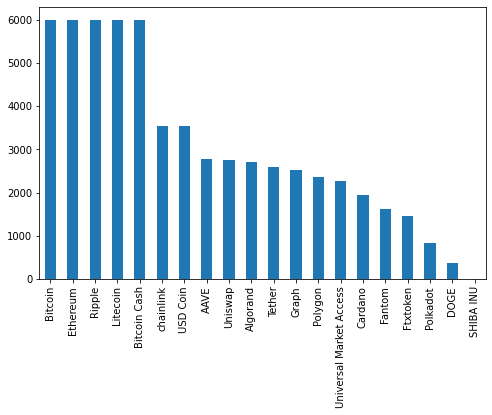

In [ ]:
#Type of coins
plt.figure(figsize=[8,5])
df['Name'].value_counts().plot(kind='bar')

**FINDING** **THE** **TOP** **5** **CRYPTOCURRENCIES** **BY** **MARKETCAP**

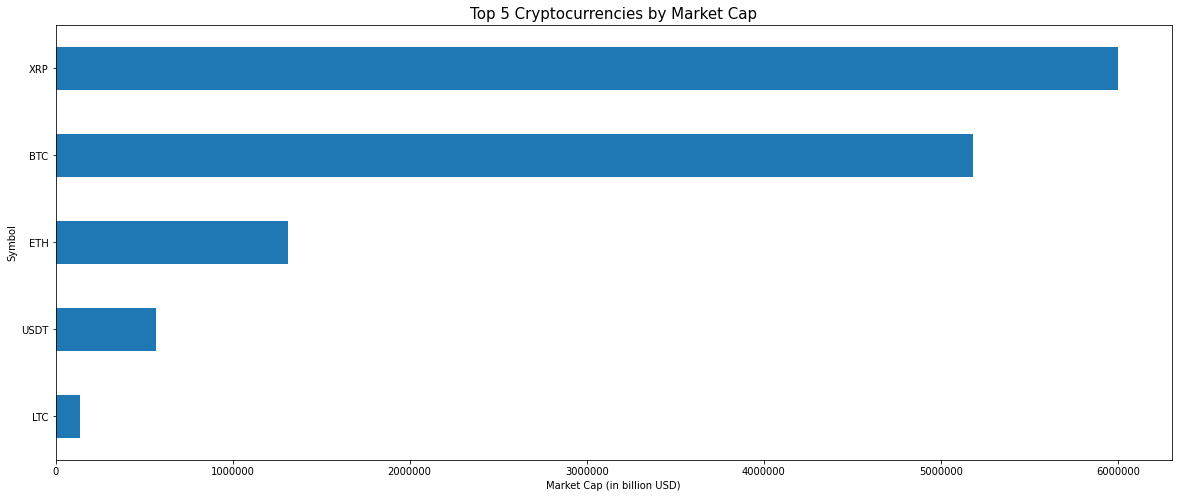

In [ ]:
plt.figure(figsize=(20,8))
ax = df.groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

**FINDING** **THE** **TOP** **5** **CRYPTOCURRENCIES** **BY** **VOLUME**

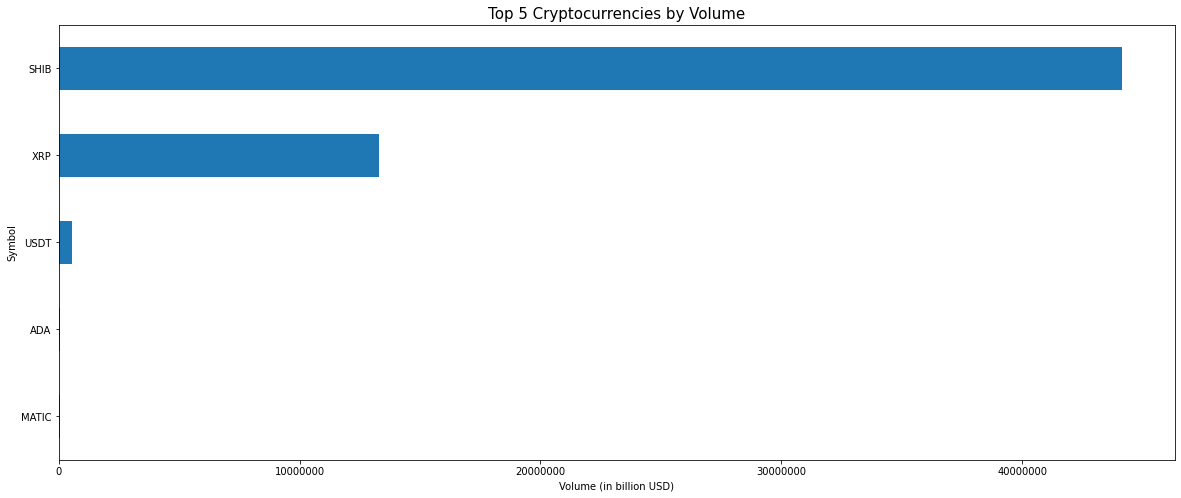

In [ ]:
plt.figure(figsize=(20,8))
ax = df.groupby(['Symbol'])['volume'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Volume (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Volume", fontsize=15)
plt.show()

**FINDING** **THE** **TOP** **5** **CRYPTOCURRENCIES** **BY** **Open Price**

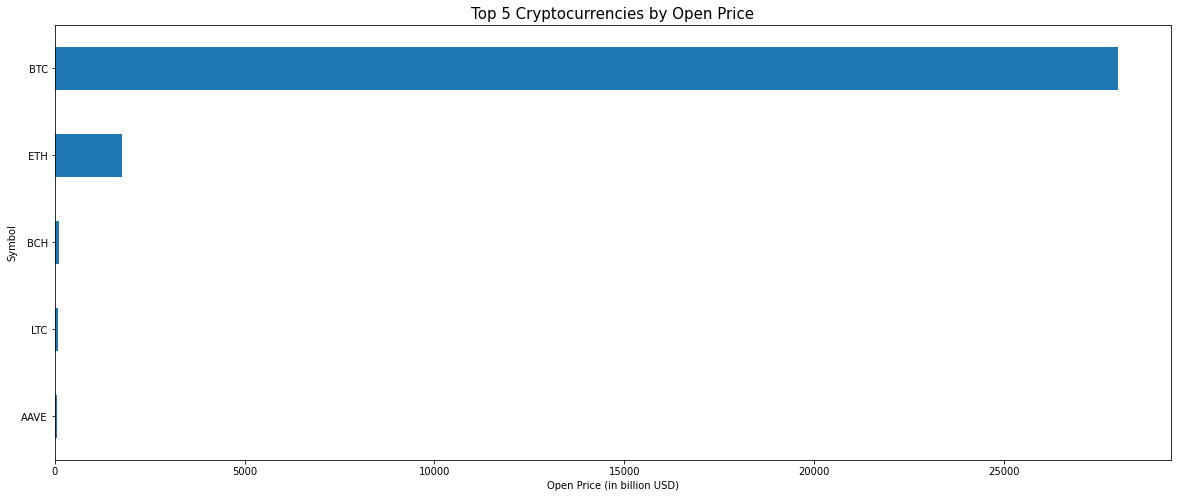

In [ ]:
plt.figure(figsize=(20,8))
ax = df.groupby(['Symbol'])['Open'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Open Price (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Open Price", fontsize=15)
plt.show()

**FINDING** **THE** **TOP** **5** **CRYPTOCURRENCIES** **BY** **CLOSE PRICE**

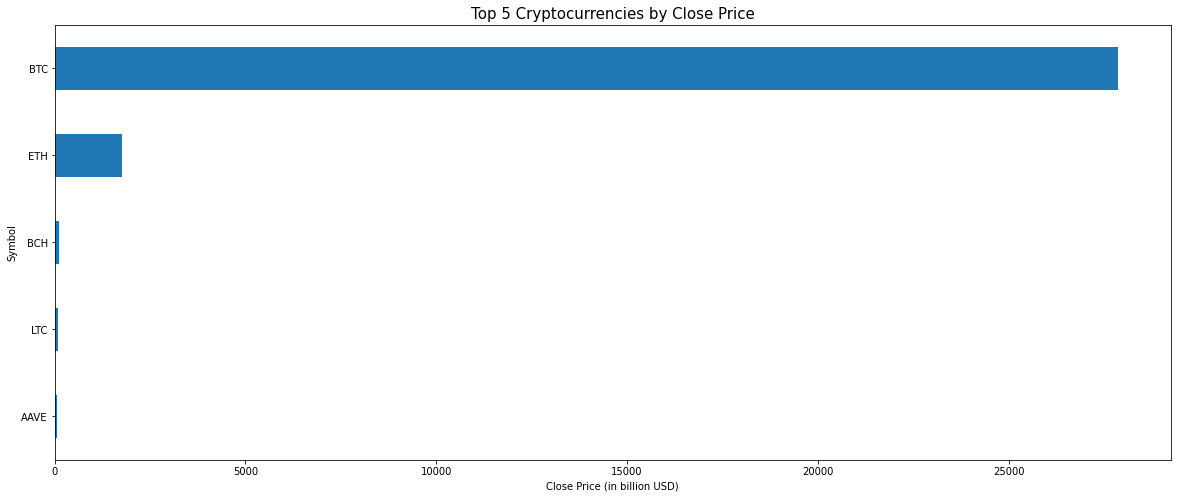

In [ ]:
plt.figure(figsize=(20,8))
ax = df.groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Close Price (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Close Price", fontsize=15)
plt.show()

### Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [ ]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).head(4).index


data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]
top_4_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two_three)]

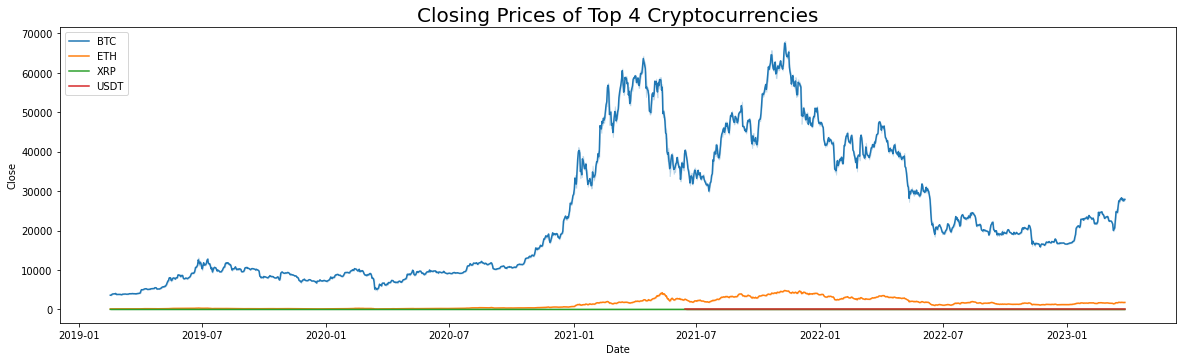

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

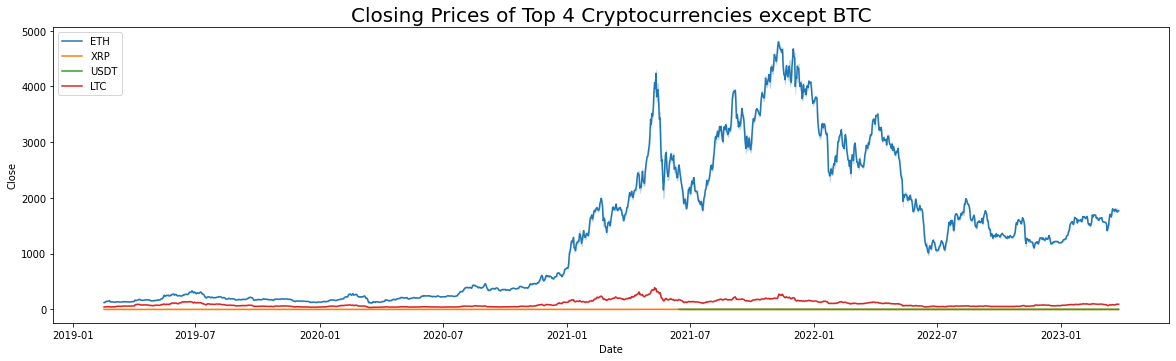

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')


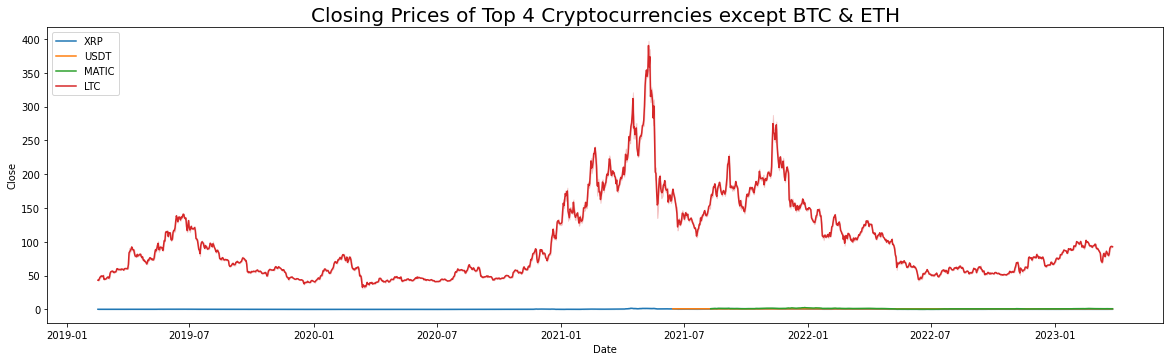

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(4,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')


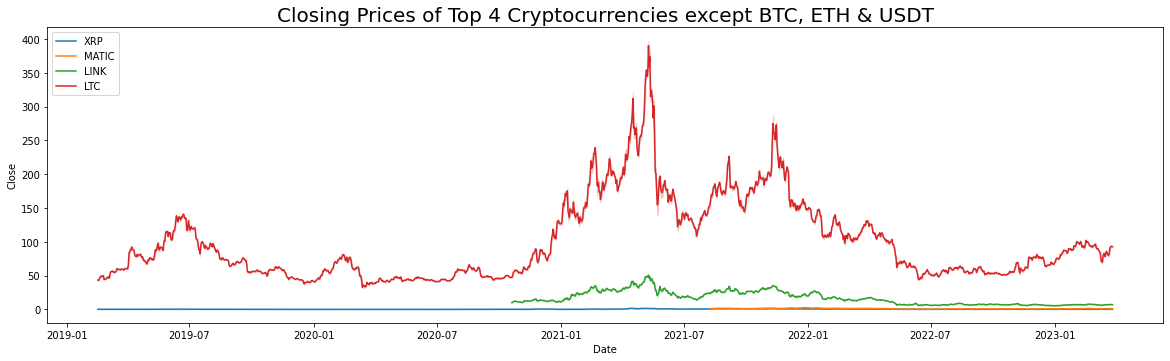

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(4,1,4)
sns.lineplot(data=top_4_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, ETH & USDT", fontsize=20)
plt.legend(loc='upper left')

plt.show()

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.


In [ ]:
for i in ['BTC','ETH','USDT','ADA']:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.


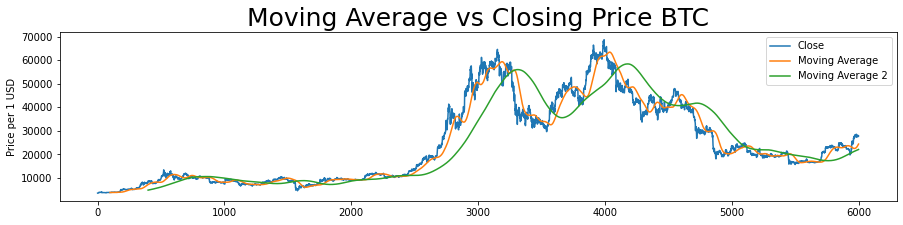

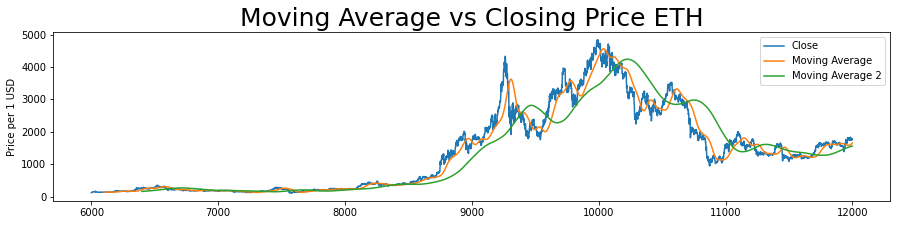

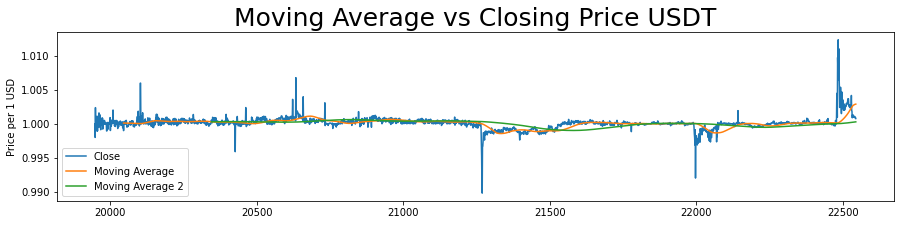

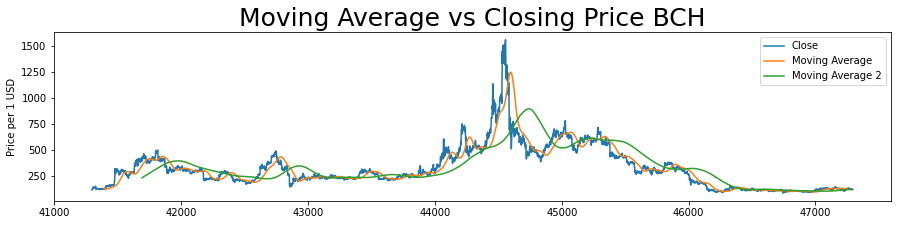

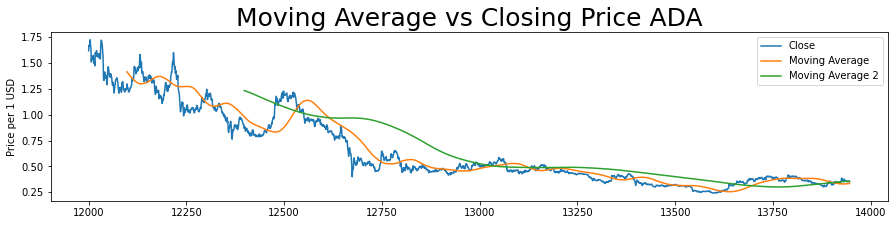

In [ ]:
for i in ['BTC','ETH','USDT','BCH','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['MarketCap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.

In [ ]:
import plotly.express as px

In [ ]:
area = px.area(data_frame= df , x = "Date" ,y= "High", line_group="Name" , color = "Name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')

area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for Top Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()

In [ ]:
area = px.area(data_frame = df,y  = "MarketCap" , x = "Date" , line_group="Name", color = "Name",color_discrete_sequence=px.colors.qualitative.Alphabet, title = 'Market Cap Change of all Cryptocurrencies')

area.update_xaxes(title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Percentage Change ', ticksuffix = '%')
area.update_layout(showlegend = True,title = {'text': 'MarKet Cap Change of all Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

area.show()

Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT --
There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.

**Conclusions:**

## **Time** **Series** **Forecasting**

In [ ]:
import pandas as pd
import time
import seaborn as sns
import datetime
import numpy as np
from math import sqrt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation, Dense
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go
import plotly.express as px
from datetime import date, timedelta

In [ ]:
df2=pd.read_csv('crypto_coins.csv')
target_col = 'Close'
df2.columns
df2.rename(columns = {'CloseTime':'Date','OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
#df1.rename(columns = {'OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
# altering the DataFrame
df2.columns
df2= df2[['Date','High','Low',	'Open',	'Close','volume',	'MarketCap']]


In [ ]:
df1=pd.read_csv('btc.csv')
target_col = 'Close'
df1.columns
df1.rename(columns = {'CloseTime':'Date','OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
#df1.rename(columns = {'OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
# altering the DataFrame
df1.columns
df1= df1[['Date','High','Low',	'Open',	'Close','volume',	'MarketCap']]

In [ ]:
#Setting The training set ratio
training_ratio = 80

#Calculating the test set ratio
test_ratio = 100-training_ratio

#Rounding the training set length to avoid fractions
training_len = round(len(df1)*(training_ratio/100))

#Setting the Test set length
test_len = round(len(df1)-training_len)

#Splitting the data based on the calculated lengths
dataset_train = df1.tail(training_len)
dataset_test = df1.head(test_len)

#Printing the shapes of training and test sets

print("Shape Of Training Set :", dataset_train.shape)
print("Shape Of Test Set :", dataset_test.shape)

Shape Of Training Set : (4800, 7)
Shape Of Test Set : (1200, 7)


In [ ]:
df2.tail(5)

Date     High      Low     Open    Close        volume  \
61301  2023-03-26 06:00:00  0.20737  0.20728  0.20728  0.20737   1082.531791   
61302  2023-03-26 12:00:00  0.20976  0.20805  0.20935  0.20961   2684.125260   
61303  2023-03-26 18:00:00  0.21112  0.20801  0.21027  0.20959  88478.857262   
61304  2023-03-27 00:00:00  0.21169  0.20976  0.21013  0.21169  32847.430858   
61305  2023-03-27 06:00:00  0.21095  0.20750  0.21036  0.20809  22836.505085   

          MarketCap  
61301    224.393700  
61302    561.853594  
61303  18559.438986  
61304   6926.684899  
61305   4791.969055

In [ ]:
#Printing the training and test sets
print(dataset_test.tail(5))
print(dataset_train.head(5))

                     Date     High      Low     Open    Close       volume  \
1195  2019-12-12 06:00:00  7296.19  7072.20  7208.95  7153.71  1564.937570   
1196  2019-12-12 12:00:00  7211.75  7101.00  7158.64  7184.33   850.504343   
1197  2019-12-12 18:00:00  7215.73  7135.03  7192.76  7193.40  1012.415517   
1198  2019-12-13 00:00:00  7253.68  7176.90  7191.17  7188.42   949.031563   
1199  2019-12-13 06:00:00  7234.50  7179.65  7185.15  7211.61   491.467088   

         MarketCap  
1195  1.122445e+07  
1196  6.087233e+06  
1197  7.273429e+06  
1198  6.850081e+06  
1199  3.543213e+06  
                     Date     High      Low     Open    Close       volume  \
1200  2019-12-13 12:00:00  7245.00  7190.00  7211.61  7211.78  1055.395538   
1201  2019-12-13 18:00:00  7302.35  7193.42  7214.95  7267.01   985.056123   
1202  2019-12-14 00:00:00  7282.71  7200.00  7267.01  7257.47   646.159747   
1203  2019-12-14 06:00:00  7269.00  7232.06  7255.94  7267.20   187.929745   
1204  2019-12-1

In [ ]:
# convert to int
df1['volume'] = df1['volume'].astype('int64')
df1['MarketCap'] = df1['MarketCap'].astype('int64')

df1.loc[df1['MarketCap']=="-",'MarketCap']=0
# look at the first few rows
df1=df1[['Date','Close','Open','High','Low','volume','MarketCap']]
df1.head()

Date    Close     Open     High      Low  volume  MarketCap
0  2019-02-16 12:00:00  3589.97  3582.44  3592.81  3576.14     588    2108720
1  2019-02-16 18:00:00  3592.07  3589.97  3609.00  3565.16    1077    3872503
2  2019-02-17 00:00:00  3580.43  3589.29  3600.36  3575.00     627    2253765
3  2019-02-17 06:00:00  3598.45  3578.74  3598.45  3570.13     611    2192649
4  2019-02-17 12:00:00  3582.49  3596.64  3663.34  3569.00    1787    6453417

In [ ]:
df1.tail(5)

Date    Close     Open     High      Low  volume  \
5995  2023-03-26 06:00:00  27583.0  27493.0  27673.0  27453.0     147   
5996  2023-03-26 12:00:00  27903.0  27582.0  27930.0  27520.0     198   
5997  2023-03-26 18:00:00  27860.0  27927.0  28217.0  27680.0     412   
5998  2023-03-27 00:00:00  28004.0  27860.0  28160.0  27716.0     340   
5999  2023-03-27 06:00:00  27855.0  27992.0  28051.0  27816.0     185   

      MarketCap  
5995    4080786  
5996    5510075  
5997   11533783  
5998    9528052  
5999    5180628

**LSTM MODEL**

Epoch 1/20
75/75 [==============================] - 20s 133ms/step - loss: 0.0106 - val_loss: 3.2565e-04
Epoch 2/20
75/75 [==============================] - 7s 89ms/step - loss: 9.9459e-04 - val_loss: 3.5445e-04
Epoch 3/20
75/75 [==============================] - 8s 102ms/step - loss: 9.8101e-04 - val_loss: 3.4958e-04
Epoch 4/20
75/75 [==============================] - 8s 107ms/step - loss: 8.8325e-04 - val_loss: 3.5628e-04
Epoch 5/20
75/75 [==============================] - 7s 91ms/step - loss: 8.1408e-04 - val_loss: 3.5950e-04
Epoch 6/20
75/75 [==============================] - 8s 103ms/step - loss: 8.1707e-04 - val_loss: 2.4064e-04
Epoch 7/20
75/75 [==============================] - 6s 87ms/step - loss: 7.9286e-04 - val_loss: 2.2581e-04
Epoch 8/20
75/75 [==============================] - 9s 124ms/step - loss: 7.2645e-04 - val_loss: 2.3361e-04
Epoch 9/20
75/75 [==============================] - 7s 94ms/step - loss: 6.9369e-04 - val_loss: 1.9309e-04
Epoch 10/20
75/75 [================

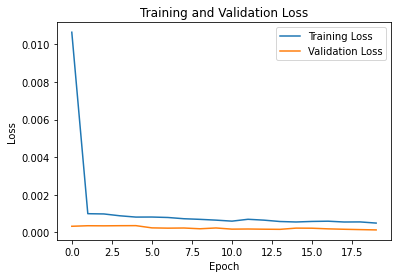

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Load the Bitcoin price data
prices = df1['Close'].values.reshape(-1,1)
dates = df1['Date'].values


# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

# Create sequences of fixed length for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(prices, seq_length)

# Split the data into training and testing datasets
train_size = int(len(X) * 0.8)
train_X, train_y = X[:train_size], y[:train_size]
test_X, test_y = X[train_size:], y[train_size:]
test_dates = dates[train_size+seq_length:]

# Reshape the data for the LSTM model
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',)

# Train the model

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=20, batch_size=64, verbose=1)
predictions = model.predict(test_X)
print('Accuracy:', 100 - (100*(abs(test_y-predictions)/test_y)).mean())
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Epoch 1/30
75/75 [==============================] - 13s 91ms/step - loss: 0.0157 - val_loss: 3.4337e-04
Epoch 2/30
75/75 [==============================] - 5s 68ms/step - loss: 0.0012 - val_loss: 3.2665e-04
Epoch 3/30
75/75 [==============================] - 6s 75ms/step - loss: 0.0011 - val_loss: 3.0512e-04
Epoch 4/30
75/75 [==============================] - 5s 65ms/step - loss: 0.0010 - val_loss: 3.2820e-04
Epoch 5/30
75/75 [==============================] - 6s 77ms/step - loss: 9.1029e-04 - val_loss: 2.8415e-04
Epoch 6/30
75/75 [==============================] - 5s 66ms/step - loss: 8.3625e-04 - val_loss: 3.0577e-04
Epoch 7/30
75/75 [==============================] - 6s 79ms/step - loss: 8.9275e-04 - val_loss: 2.5698e-04
Epoch 8/30
75/75 [==============================] - 5s 65ms/step - loss: 7.7702e-04 - val_loss: 2.5823e-04
Epoch 9/30
75/75 [==============================] - 6s 74ms/step - loss: 8.2385e-04 - val_loss: 2.3941e-04
Epoch 10/30
75/75 [==============================] -

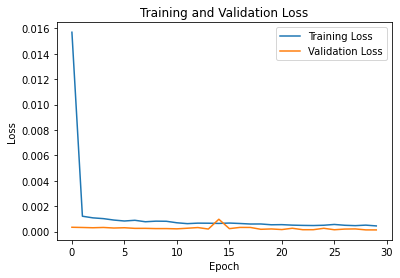

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Load the Bitcoin price data

prices = df1['Close'].values.reshape(-1,1)
dates = df1['Date'].values

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

# Create sequences of fixed length for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(prices, seq_length)

# Split the data into training and testing datasets
train_size = int(len(X) * 0.8)
train_X, train_y = X[:train_size], y[:train_size]
test_X, test_y = X[train_size:], y[train_size:]
test_dates = dates[train_size+seq_length:]

# Reshape the data for the LSTM model
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=30, batch_size=64, verbose=1)
predictions = model.predict(test_X)
print('Accuracy:', 100 - (100*(abs(test_y-predictions)/test_y)).mean())
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from datetime import datetime, timedelta



Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


75/75 [==============================] - 18s 164ms/step - loss: 0.0119 - val_loss: 4.1457e-04
Epoch 2/50
75/75 [==============================] - 11s 145ms/step - loss: 0.0024 - val_loss: 3.4054e-04
Epoch 3/50
75/75 [==============================] - 11s 146ms/step - loss: 0.0021 - val_loss: 5.8968e-04
Epoch 4/50
75/75 [==============================] - 11s 141ms/step - loss: 0.0020 - val_loss: 2.7192e-04
Epoch 5/50
75/75 [==============================] - 11s 146ms/step - loss: 0.0019 - val_loss: 6.0195e-04
Epoch 6/50
75/75 [==============================] - 12s 155ms/step - loss: 0.0018 - val_loss: 6.1660e-04
Epoch 7/50
75/75 [==============================] - 11s 146ms/step - loss: 0.0017 - val_loss: 2.4577e-04
Epoch 8/50
75/75 [==============================] - 11s 147ms/step - loss: 0.0016 - val_loss: 3.9259e-04
Epoch 9/50
75/75 [==============================] - 12s 157ms/step - loss: 0.0017 - val_loss: 2.6378e-04
Epoch 10/50
75/75 [==============================] - 12s 154ms/ste

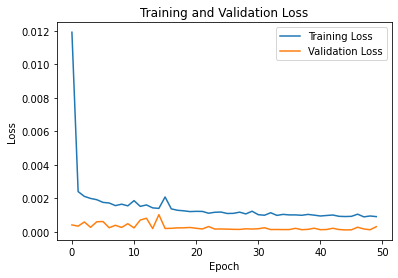

36/36 [==============================] - 1s 33ms/step


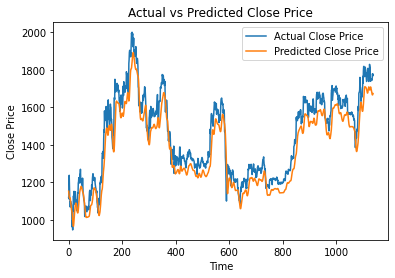

1/1 [==============================] - 0s 52ms/step
On 2023-03-28, Etherium price is predicted to be 1682.44. Buy Etherium.


In [ ]:
def pre(data,future_date_str,target_coin):
  df1=pd.read_csv(data)
  target_col = 'Close'
  df1.columns
  df1.rename(columns = {'CloseTime':'Date','OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
  #df1.rename(columns = {'OpenPrice' : 'Open', 'HighPrice' : 'High', 'ClosePrice' : 'Close', 'HighPrice' : 'High', 'LowPrice' : 'Low'}, inplace = True)
  # altering the DataFrame

  df1= df1[['Date','High','Low',	'Open',	'Close','volume',	'MarketCap']]
  df1['volume'] = df1['volume'].astype('int64')
  df1['MarketCap'] = df1['MarketCap'].astype('int64')

  df1.loc[df1['MarketCap']=="-",'MarketCap']=0
  # look at the first few rows
  df1=df1[['Date','Close','Open','High','Low','volume','MarketCap']]

  prices = df1['Close'].values.reshape(-1,1)
  dates = df1['Date'].values
  target_coin='Etherium'
  # Extracting the close price column and converting it to a numpy array
  close_data = df1['Close'].values.reshape(-1, 1)

  dates = df1['Date'].values

  # Data preprocessing
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_data = scaler.fit_transform(close_data)

  # Creating training and testing data
  train_data = scaled_data[:int(0.8*len(close_data)), :]
  test_data = scaled_data[int(0.8*len(close_data)):, :]

  # Creating input and output data
  def create_dataset(dataset, time_step=1):
      X, Y = [], []
      for i in range(len(dataset)-time_step-1):
          a = dataset[i:(i+time_step), :]
          X.append(a)
          Y.append(dataset[i+time_step, :])
      return np.array(X), np.array(Y)

  time_step = 60
  X_train, Y_train = create_dataset(train_data, time_step)
  X_test, Y_test = create_dataset(test_data, time_step)

  # Building the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(50, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(50))
  model.add(Dropout(0.2))
  model.add(Dense(Y_train.shape[1]))
  optimizer = Adam(lr=0.001)
  model.compile(loss='mean_squared_error', optimizer=optimizer)

  # Adding early stopping callback to prevent overfitting
  early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

  history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=64, verbose=1)
  predictions = model.predict(X_test)
  print('Accuracy:', 100 - (100*(abs(Y_test-predictions)/Y_test)).mean())
  mse = mean_squared_error(Y_test, predictions)
  print("Mean Squared Error:", mse)
  # Plotting the training and validation loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Making predictions on testing data
  predictions = model.predict(X_test)
  # Reversing the scaling of predictions and actual values
  predictions = scaler.inverse_transform(predictions)
  Y_test = scaler.inverse_transform(Y_test)

  # Plotting the predicted and actual values
  plt.plot(Y_test, label='Actual Close Price')
  plt.plot(predictions, label='Predicted Close Price')
  plt.title('Actual vs Predicted Close Price')
  plt.xlabel('Time')
  plt.ylabel('Close Price')
  plt.legend()
  plt.show()

  # Predict the Bitcoin price on a particular day in the future
  #future_date_str = '2023-03-28'
  future_date = datetime.strptime(future_date_str, '%Y-%m-%d')
  future_prices = []
  while len(future_prices) < time_step:
      future_date -= timedelta(days=1)
      idx = np.where(dates == future_date.strftime('%Y-%m-%d %H:%M:%S'))[0]
      if len(idx) == 1:
          price = scaled_data[idx][0]
          future_prices.append(price)
  future_prices = np.flip(future_prices, axis=0).reshape((1, time_step, 1))
  predicted_price = model.predict(future_prices)[0][0]
  predicted_price = scaler.inverse_transform(np.array([[predicted_price]]))[0][0]

  # Make a decision to buy or sell based on the predicted price
  last_price = scaled_data[-1][0]
  if predicted_price > last_price:
      print(f"On {future_date_str}, {target_coin} price is predicted to be {predicted_price:.2f}. Buy {target_coin}.")
  else:
      print(f"On {future_date_str}, {target_coin} is predicted to be {predicted_price:.2f}. Sell {target_coin}.")


data='eth.csv'
future_date_str = '2023-03-28'
target_coin='Etherium'
pre(data,future_date_str,target_coin)


**Changing the number of neurons in an LSTM layer, the number of epochs, the dropout rate, or the number of dense units can all affect the performance of an LSTM model :-**

----Increasing the number of neurons in an LSTM layer can make the model more complex and potentially able to capture more complex patterns in the data. However, increasing the number of neurons may also increase the risk of overfitting, which can lead to poor performance on new, unseen data.

------If the number of neurons in LSTM is decreased, the model's capacity to learn complex patterns may decrease. This can result in lower accuracy and weaker predictions. On the other hand, if the number of neurons is increased, the model may become too complex and overfit to the training data, resulting in poor performance on new data.


----Increasing the number of epochs can give the model more opportunities to learn from the data, potentially leading to better performance. However, increasing the number of epochs beyond a certain point may also lead to overfitting, especially if the model is too complex.


----If the number of epochs is decreased, the model may not have sufficient time to learn and converge to a good solution. This can result in underfitting, where the model is not able to capture the underlying patterns in the data. If the number of epochs is increased, the model may overfit the training data, resulting in poor performance on new data.

----Increasing the dropout rate can help prevent overfitting by randomly dropping out a certain proportion of neurons during training. However, increasing the dropout rate too much may also lead to underfitting, as the model may not have enough capacity to learn from the data.

----Increasing the number of dense units can increase the complexity of the output layer, potentially allowing the model to make more precise predictions. However, increasing the number of dense units may also increase the risk of overfitting, especially if the model is too complex or if the input data is noisy or contains irrelevant features.


-----If the dropout count is decreased, the model may overfit the training data, resulting in poor performance on new data. If the dropout count is increased, it may result in underfitting, where the model is not able to capture the underlying patterns in the data.

----If the number of epochs is decreased, the model may not have sufficient time to learn and converge to a good solution. This can result in underfitting, where the model is not able to capture the underlying patterns in the data. If the number of epochs is increased, the model may overfit the training data, resulting in poor performance on new data.


----If the value of the dense layer is decreased, the model's capacity to learn complex patterns may decrease, resulting in lower accuracy and weaker predictions. If the value is increased, the model may become too complex and overfit to the training data, resulting in poor performance on new data.

